In [2]:
import tensorflow as tf 
from tqdm import tqdm

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv


In [3]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 126, in _parse_requirement_details
          marker = _parse_requirement_marker(
        File 

In [4]:
test   =pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv')
test_l =pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv')

In [5]:
test_l


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [6]:
df=pd.read_csv('train.csv')

In [7]:
#df=df.sample(500) this  is to reduce df size to test model function quickly
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


***Preprocessing:***

In [8]:
from tensorflow.keras.layers import TextVectorization


Splitting the label and target 

In [9]:
X= df['comment_text']
y= df[df.columns[2:]].values

In [10]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [11]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [12]:
MAX_FEATURES = 2000000 #Number of max words in vocab 

In [13]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                              output_sequence_length=1800,
                              output_mode='int') 

In [14]:
vectorizer.adapt(X.values)

In [15]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [16]:
vectorizer('Hello this me vecortizing this sentance ')

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([288,  14,  36, ...,   0,   0,   0])>

In [17]:
vectorized_text=vectorizer(X.values)

In [18]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[   645,     76,      2, ...,      0,      0,      0],
       [219427,     54,   2489, ...,      0,      0,      0],
       [   425,    441,     70, ...,      0,      0,      0],
       ...,
       [ 32445,   7392,    383, ...,      0,      0,      0],
       [     5,     12,    534, ...,      0,      0,      0],
       [     5,      8,    130, ...,      0,      0,      0]])>

In [19]:
#Creating Tensorflow Data pipeline
data=tf.data.Dataset.from_tensor_slices((vectorized_text,y))
data = data.cache()
data = data.shuffle(160000)
data = data.batch(16)
data = data.prefetch(8) #helps bottelnecks

In [20]:
batch_X,batch_Y = data.as_numpy_iterator().next()
batch_X

array([[     8,     19,    128, ...,      0,      0,      0],
       [   776,    788,    176, ...,      0,      0,      0],
       [    46,   1377,     31, ...,      0,      0,      0],
       ...,
       [ 46604,  50864,   2147, ...,      0,      0,      0],
       [   104,      7,     51, ...,      0,      0,      0],
       [211784,     94,     13, ...,      0,      0,      0]])

In [21]:
train = data.take(int(len(data)*0.7))
val   = data.skip(int(len(data)*0.7)).take(int(len(data)*0.2))
test  = data.skip(int(len(data)*0.9)).take(int(len(data)*0.1))


In [22]:
train_generator=train.as_numpy_iterator()

***Modeling :***

Sequential Model:

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [24]:
from tensorflow.keras.layers import Dropout, BatchNormalization

model = Sequential()

# Create the embedding layer
model.add(Embedding(MAX_FEATURES + 1, 32))

# Add dropout after the embedding layer
model.add(Dropout(0.2))  # Adjust dropout rate as needed

model.add(Bidirectional(LSTM(32, activation='tanh')))

# Add dropout after the LSTM layer
model.add(Dropout(0.2))  # Adjust dropout rate as needed

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())  # Add batch normalization

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Add dropout before the final output layer
model.add(Dropout(0.5))  # Adjust dropout rate as needed

# Final Layer maps to output 
model.add(Dense(6, activation='sigmoid'))

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam')


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(train,epochs=10,validation_data=val)


Epoch 1/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 657s 93ms/step - loss: 0.0973 - val_loss: 0.0545
Epoch 2/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 650s 93ms/step - loss: 0.0543 - val_loss: 0.0478
Epoch 3/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 651s 93ms/step - loss: 0.0476 - val_loss: 0.0423
Epoch 4/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 651s 93ms/step - loss: 0.0437 - val_loss: 0.0376
Epoch 5/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 650s 93ms/step - loss: 0.0418 - val_loss: 0.0451
Epoch 6/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 651s 93ms/step - loss: 0.0393 - val_loss: 0.0357
Epoch 7/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 672s 96ms/step - loss: 0.0383 - val_loss: 0.0332
Epoch 8/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 656s 94ms/step - loss: 0.0367 - val_loss: 0.0328
Epoch 9/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 651s 93ms/step - loss: 0.0349 - val_loss: 0.0313
Epoch 10/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 651s 93ms/step - loss: 0.0349 - val_loss: 0.0323


In [39]:
history.history

{'loss': [0.07474464178085327,
  0.05343043804168701,
  0.0480913445353508,
  0.044627122581005096,
  0.04159294813871384,
  0.03963964805006981,
  0.03856241703033447,
  0.03742717579007149,
  0.035548653453588486,
  0.034791719168424606],
 'val_loss': [0.05452525615692139,
  0.047844044864177704,
  0.042289670556783676,
  0.03755560889840126,
  0.04508177191019058,
  0.03569060191512108,
  0.033248431980609894,
  0.0328080877661705,
  0.031259942799806595,
  0.032328397035598755]}

<Figure size 800x500 with 0 Axes>

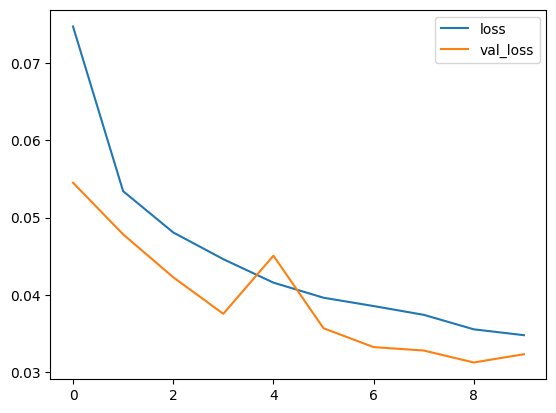

In [41]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [44]:
model.save('my_model1.keras')


In [30]:
# model.save('True_model.keras')

In [31]:
# new_model = tf.keras.models.load_model('True_model.keras')

In [ ]:
df[df['threat']==1]

***Make Predictions :***

In [55]:
comment="you freaking suck "
input_text= vectorizer(comment)

result = model.predict(np.expand_dims(input_text,0)) 

result_list=df.columns[2:]
result_df=pd.DataFrame(result, columns=result_list)
result_df.insert(0, 'ID', comment)

result_df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


,ID,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,you freaking suck,0.999865,0.346226,0.989907,0.058144,0.921098,0.241713


In [33]:
result.flatten().shape

(6,)

***Model Evaluation :***

In [52]:
from tensorflow.keras.metrics import Precision, Recall ,CategoricalAccuracy

In [53]:
pre = Precision()
rec = Recall()
acc = CategoricalAccuracy()

In [54]:
from tqdm import tqdm

for batch in tqdm(test.as_numpy_iterator(), total=len(test)):
    # Unpacking the batch
    X_true, y_true = batch 
    # Making predictions
    y_pred = model.predict(X_true)
    
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    
    pre.update_state(y_true, y_pred)
    rec.update_state(y_true, y_pred)
    acc.update_state(y_true, y_pred)

  0%|          | 0/997 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  0%|          | 1/997 [00:00<12:42,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  0%|          | 2/997 [00:00<06:25,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  0%|          | 3/997 [00:01<04:24,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  0%|          | 4/997 [00:01<03:28,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  1%|          | 5/997 [00:01<02:57,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  1%|          | 6/997 [00:01<02:38,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  1%|          | 7/997 [00:01<02:22,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  1%|          | 8/997 [00:01<02:16,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  1%|          | 9/997 [00:01<02:09,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  1%|          | 10/997 [00:01<02:05,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  1%|          | 11/997 [00:01<02:03,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  1%|          | 12/997 [00:02<01:57,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  1%|▏         | 13/997 [00:02<01:53,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  1%|▏         | 14/997 [00:02<01:50,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  2%|▏         | 15/997 [00:02<01:55,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  2%|▏         | 16/997 [00:02<01:51,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  2%|▏         | 17/997 [00:02<01:48,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  2%|▏         | 18/997 [00:02<01:46,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  2%|▏         | 19/997 [00:02<01:45,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  2%|▏         | 20/997 [00:02<01:45,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  2%|▏         | 21/997 [00:03<01:44,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  2%|▏         | 22/997 [00:03<01:43,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  2%|▏         | 23/997 [00:03<01:44,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  2%|▏         | 24/997 [00:03<01:45,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  3%|▎         | 25/997 [00:03<01:45,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  3%|▎         | 26/997 [00:03<01:44,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  3%|▎         | 27/997 [00:03<01:43,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  3%|▎         | 28/997 [00:03<01:43,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  3%|▎         | 29/997 [00:03<01:48,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  3%|▎         | 30/997 [00:04<01:46,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  3%|▎         | 31/997 [00:04<01:44,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  3%|▎         | 32/997 [00:04<01:44,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  3%|▎         | 33/997 [00:04<01:43,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  3%|▎         | 34/997 [00:04<01:43,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  4%|▎         | 35/997 [00:04<01:42,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  4%|▎         | 36/997 [00:04<01:43,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  4%|▎         | 37/997 [00:04<01:48,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  4%|▍         | 38/997 [00:04<01:50,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  4%|▍         | 39/997 [00:05<01:52,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  4%|▍         | 40/997 [00:05<01:54,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  4%|▍         | 41/997 [00:05<01:54,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  4%|▍         | 42/997 [00:05<01:53,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  4%|▍         | 43/997 [00:05<01:53,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  4%|▍         | 44/997 [00:05<01:54,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  5%|▍         | 45/997 [00:05<01:54,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  5%|▍         | 46/997 [00:05<01:53,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  5%|▍         | 47/997 [00:06<01:54,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  5%|▍         | 48/997 [00:06<01:54,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  5%|▍         | 49/997 [00:06<01:53,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  5%|▌         | 50/997 [00:06<01:53,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  5%|▌         | 51/997 [00:06<01:53,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  5%|▌         | 52/997 [00:06<01:47,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  5%|▌         | 53/997 [00:06<01:44,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  5%|▌         | 54/997 [00:06<01:46,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  6%|▌         | 55/997 [00:06<01:44,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  6%|▌         | 56/997 [00:07<01:43,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  6%|▌         | 57/997 [00:07<01:41,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  6%|▌         | 58/997 [00:07<01:40,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  6%|▌         | 59/997 [00:07<01:41,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  6%|▌         | 60/997 [00:07<01:39,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  6%|▌         | 61/997 [00:07<01:39,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  6%|▌         | 62/997 [00:07<01:38,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  6%|▋         | 63/997 [00:07<01:37,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  6%|▋         | 64/997 [00:07<01:37,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  7%|▋         | 65/997 [00:07<01:37,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  7%|▋         | 66/997 [00:08<01:40,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  7%|▋         | 67/997 [00:08<01:41,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  7%|▋         | 68/997 [00:08<01:41,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  7%|▋         | 69/997 [00:08<01:40,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  7%|▋         | 70/997 [00:08<01:38,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  7%|▋         | 71/997 [00:08<01:38,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  7%|▋         | 72/997 [00:08<01:38,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  7%|▋         | 73/997 [00:08<01:37,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  7%|▋         | 74/997 [00:08<01:36,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  8%|▊         | 75/997 [00:09<01:36,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  8%|▊         | 76/997 [00:09<01:36,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  8%|▊         | 77/997 [00:09<01:36,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  8%|▊         | 78/997 [00:09<01:36,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  8%|▊         | 79/997 [00:09<01:36,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  8%|▊         | 80/997 [00:09<01:38,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  8%|▊         | 81/997 [00:09<01:39,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  8%|▊         | 82/997 [00:09<01:39,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  8%|▊         | 83/997 [00:09<01:38,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  8%|▊         | 84/997 [00:10<01:39,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  9%|▊         | 85/997 [00:10<01:38,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  9%|▊         | 86/997 [00:10<01:37,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  9%|▊         | 87/997 [00:10<01:38,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  9%|▉         | 88/997 [00:10<01:37,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  9%|▉         | 89/997 [00:10<01:37,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  9%|▉         | 90/997 [00:10<01:35,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  9%|▉         | 91/997 [00:10<01:35,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  9%|▉         | 92/997 [00:10<01:37,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  9%|▉         | 93/997 [00:10<01:41,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  9%|▉         | 94/997 [00:11<01:43,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 10%|▉         | 95/997 [00:11<01:43,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 10%|▉         | 96/997 [00:11<01:42,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 10%|▉         | 97/997 [00:11<01:39,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 10%|▉         | 98/997 [00:11<01:37,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 10%|▉         | 99/997 [00:11<01:36,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 10%|█         | 100/997 [00:11<01:35,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 10%|█         | 101/997 [00:11<01:34,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 10%|█         | 102/997 [00:11<01:32,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 10%|█         | 103/997 [00:12<01:33,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 10%|█         | 104/997 [00:12<01:34,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 11%|█         | 105/997 [00:12<01:34,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 11%|█         | 106/997 [00:12<01:34,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 11%|█         | 107/997 [00:12<01:34,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 11%|█         | 108/997 [00:12<01:34,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 11%|█         | 109/997 [00:12<01:33,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 11%|█         | 110/997 [00:12<01:33,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 11%|█         | 111/997 [00:12<01:32,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 11%|█         | 112/997 [00:12<01:32,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 11%|█▏        | 113/997 [00:13<01:32,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 11%|█▏        | 114/997 [00:13<01:32,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 12%|█▏        | 115/997 [00:13<01:32,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 12%|█▏        | 116/997 [00:13<01:33,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 12%|█▏        | 117/997 [00:13<01:33,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 12%|█▏        | 118/997 [00:13<01:32,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 12%|█▏        | 119/997 [00:13<01:34,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 12%|█▏        | 120/997 [00:13<01:34,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 12%|█▏        | 121/997 [00:13<01:38,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 12%|█▏        | 122/997 [00:14<01:36,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 12%|█▏        | 123/997 [00:14<01:35,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 12%|█▏        | 124/997 [00:14<01:34,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 13%|█▎        | 125/997 [00:14<01:33,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 13%|█▎        | 126/997 [00:14<01:32,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 13%|█▎        | 127/997 [00:14<01:31,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 13%|█▎        | 128/997 [00:14<01:32,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 13%|█▎        | 129/997 [00:14<01:31,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 13%|█▎        | 130/997 [00:14<01:31,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 13%|█▎        | 131/997 [00:15<01:30,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 13%|█▎        | 132/997 [00:15<01:30,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 13%|█▎        | 133/997 [00:15<01:29,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 13%|█▎        | 134/997 [00:15<01:30,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 14%|█▎        | 135/997 [00:15<01:29,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 14%|█▎        | 136/997 [00:15<01:29,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 14%|█▎        | 137/997 [00:15<01:29,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 14%|█▍        | 138/997 [00:15<01:28,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 14%|█▍        | 139/997 [00:15<01:28,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 14%|█▍        | 140/997 [00:15<01:36,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 14%|█▍        | 141/997 [00:16<01:34,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 14%|█▍        | 142/997 [00:16<01:33,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 14%|█▍        | 143/997 [00:16<01:32,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 14%|█▍        | 144/997 [00:16<01:31,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 15%|█▍        | 145/997 [00:16<01:30,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 15%|█▍        | 146/997 [00:16<01:29,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 15%|█▍        | 147/997 [00:16<01:28,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 15%|█▍        | 148/997 [00:16<01:28,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 15%|█▍        | 149/997 [00:16<01:28,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 15%|█▌        | 150/997 [00:17<01:27,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 15%|█▌        | 151/997 [00:17<01:27,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 15%|█▌        | 152/997 [00:17<01:29,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 15%|█▌        | 153/997 [00:17<01:29,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 15%|█▌        | 154/997 [00:17<01:29,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 16%|█▌        | 155/997 [00:17<01:29,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 16%|█▌        | 156/997 [00:17<01:28,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 16%|█▌        | 157/997 [00:17<01:28,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 16%|█▌        | 158/997 [00:17<01:28,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 16%|█▌        | 159/997 [00:17<01:27,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 16%|█▌        | 160/997 [00:18<01:27,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 16%|█▌        | 161/997 [00:18<01:27,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 16%|█▌        | 162/997 [00:18<01:27,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 16%|█▋        | 163/997 [00:18<01:26,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 16%|█▋        | 164/997 [00:18<01:27,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 17%|█▋        | 165/997 [00:18<01:27,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 17%|█▋        | 166/997 [00:18<01:27,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 17%|█▋        | 167/997 [00:18<01:26,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 17%|█▋        | 168/997 [00:18<01:26,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 17%|█▋        | 169/997 [00:19<01:33,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 17%|█▋        | 170/997 [00:19<01:31,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 17%|█▋        | 171/997 [00:19<01:29,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 17%|█▋        | 172/997 [00:19<01:28,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 17%|█▋        | 173/997 [00:19<01:27,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 17%|█▋        | 174/997 [00:19<01:27,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 18%|█▊        | 175/997 [00:19<01:26,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 18%|█▊        | 176/997 [00:19<01:27,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 18%|█▊        | 177/997 [00:19<01:27,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 18%|█▊        | 178/997 [00:20<01:26,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 18%|█▊        | 179/997 [00:20<01:26,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 18%|█▊        | 180/997 [00:20<01:25,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 18%|█▊        | 181/997 [00:20<01:26,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 18%|█▊        | 182/997 [00:20<01:26,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 18%|█▊        | 183/997 [00:20<01:25,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 18%|█▊        | 184/997 [00:20<01:24,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 19%|█▊        | 185/997 [00:20<01:24,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 19%|█▊        | 186/997 [00:20<01:23,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 19%|█▉        | 187/997 [00:20<01:23,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 19%|█▉        | 188/997 [00:21<01:24,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 19%|█▉        | 189/997 [00:21<01:24,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 19%|█▉        | 190/997 [00:21<01:25,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 19%|█▉        | 191/997 [00:21<01:25,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 19%|█▉        | 192/997 [00:21<01:25,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 19%|█▉        | 193/997 [00:21<01:25,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 19%|█▉        | 194/997 [00:21<01:25,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 20%|█▉        | 195/997 [00:21<01:24,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 20%|█▉        | 196/997 [00:21<01:23,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 20%|█▉        | 197/997 [00:22<01:23,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 20%|█▉        | 198/997 [00:22<01:22,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 20%|█▉        | 199/997 [00:22<01:22,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 20%|██        | 200/997 [00:22<01:24,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 20%|██        | 201/997 [00:22<01:24,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 20%|██        | 202/997 [00:22<01:24,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 20%|██        | 203/997 [00:22<01:23,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 20%|██        | 204/997 [00:22<01:23,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 21%|██        | 205/997 [00:22<01:23,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 21%|██        | 206/997 [00:22<01:23,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 21%|██        | 207/997 [00:23<01:27,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 21%|██        | 208/997 [00:23<01:28,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 21%|██        | 209/997 [00:23<01:31,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 21%|██        | 210/997 [00:23<01:32,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 21%|██        | 211/997 [00:23<01:30,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 21%|██▏       | 212/997 [00:23<01:29,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 21%|██▏       | 213/997 [00:23<01:30,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 21%|██▏       | 214/997 [00:23<01:31,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 22%|██▏       | 215/997 [00:24<01:31,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 22%|██▏       | 216/997 [00:24<01:29,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 22%|██▏       | 217/997 [00:24<01:27,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 22%|██▏       | 218/997 [00:24<01:24,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 22%|██▏       | 219/997 [00:24<01:23,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 22%|██▏       | 220/997 [00:24<01:23,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 22%|██▏       | 221/997 [00:24<01:22,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 22%|██▏       | 222/997 [00:24<01:21,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 22%|██▏       | 223/997 [00:24<01:20,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 22%|██▏       | 224/997 [00:24<01:21,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 23%|██▎       | 225/997 [00:25<01:21,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 23%|██▎       | 226/997 [00:25<01:21,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 23%|██▎       | 227/997 [00:25<01:21,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 23%|██▎       | 228/997 [00:25<01:20,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 23%|██▎       | 229/997 [00:25<01:20,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 23%|██▎       | 230/997 [00:25<01:20,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 23%|██▎       | 231/997 [00:25<01:20,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 23%|██▎       | 232/997 [00:25<01:19,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 23%|██▎       | 233/997 [00:25<01:19,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 23%|██▎       | 234/997 [00:26<01:18,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 24%|██▎       | 235/997 [00:26<01:18,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 24%|██▎       | 236/997 [00:26<01:19,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 24%|██▍       | 237/997 [00:26<01:19,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 24%|██▍       | 238/997 [00:26<01:19,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 24%|██▍       | 239/997 [00:26<01:19,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 24%|██▍       | 240/997 [00:26<01:19,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 24%|██▍       | 241/997 [00:26<01:18,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 24%|██▍       | 242/997 [00:26<01:18,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 24%|██▍       | 243/997 [00:26<01:18,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 24%|██▍       | 244/997 [00:27<01:17,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 25%|██▍       | 245/997 [00:27<01:18,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 25%|██▍       | 246/997 [00:27<01:17,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 25%|██▍       | 247/997 [00:27<01:17,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 25%|██▍       | 248/997 [00:27<01:18,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 25%|██▍       | 249/997 [00:27<01:18,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 25%|██▌       | 250/997 [00:27<01:19,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 25%|██▌       | 251/997 [00:27<01:19,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 25%|██▌       | 252/997 [00:27<01:18,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 25%|██▌       | 253/997 [00:27<01:18,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 25%|██▌       | 254/997 [00:28<01:18,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 26%|██▌       | 255/997 [00:28<01:17,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 26%|██▌       | 256/997 [00:28<01:17,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 26%|██▌       | 257/997 [00:28<01:17,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 26%|██▌       | 258/997 [00:28<01:16,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 26%|██▌       | 259/997 [00:28<01:16,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 26%|██▌       | 260/997 [00:28<01:17,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 26%|██▌       | 261/997 [00:28<01:17,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 26%|██▋       | 262/997 [00:28<01:18,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 26%|██▋       | 263/997 [00:29<01:17,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 26%|██▋       | 264/997 [00:29<01:17,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 27%|██▋       | 265/997 [00:29<01:17,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 27%|██▋       | 266/997 [00:29<01:17,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 27%|██▋       | 267/997 [00:29<01:17,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 27%|██▋       | 268/997 [00:29<01:17,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 27%|██▋       | 269/997 [00:29<01:16,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 27%|██▋       | 270/997 [00:29<01:16,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 27%|██▋       | 271/997 [00:29<01:15,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 27%|██▋       | 272/997 [00:29<01:16,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 27%|██▋       | 273/997 [00:30<01:16,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 27%|██▋       | 274/997 [00:30<01:16,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 28%|██▊       | 275/997 [00:30<01:16,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 28%|██▊       | 276/997 [00:30<01:16,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 28%|██▊       | 277/997 [00:30<01:16,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 28%|██▊       | 278/997 [00:30<01:16,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 28%|██▊       | 279/997 [00:30<01:15,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 28%|██▊       | 280/997 [00:30<01:15,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 28%|██▊       | 281/997 [00:30<01:14,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 28%|██▊       | 282/997 [00:31<01:14,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 28%|██▊       | 283/997 [00:31<01:14,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 28%|██▊       | 284/997 [00:31<01:15,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 29%|██▊       | 285/997 [00:31<01:15,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 29%|██▊       | 286/997 [00:31<01:15,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 29%|██▉       | 287/997 [00:31<01:15,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 29%|██▉       | 288/997 [00:31<01:15,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 29%|██▉       | 289/997 [00:31<01:14,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 29%|██▉       | 290/997 [00:31<01:14,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 29%|██▉       | 291/997 [00:31<01:13,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 29%|██▉       | 292/997 [00:32<01:13,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 29%|██▉       | 293/997 [00:32<01:13,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 29%|██▉       | 294/997 [00:32<01:13,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 30%|██▉       | 295/997 [00:32<01:14,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 30%|██▉       | 296/997 [00:32<01:15,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 30%|██▉       | 297/997 [00:32<01:15,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 30%|██▉       | 298/997 [00:32<01:15,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 30%|██▉       | 299/997 [00:32<01:15,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 30%|███       | 300/997 [00:32<01:15,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 30%|███       | 301/997 [00:33<01:15,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 30%|███       | 302/997 [00:33<01:14,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 30%|███       | 303/997 [00:33<01:14,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 30%|███       | 304/997 [00:33<01:14,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 31%|███       | 305/997 [00:33<01:13,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 31%|███       | 306/997 [00:33<01:12,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 31%|███       | 307/997 [00:33<01:12,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 31%|███       | 308/997 [00:33<01:14,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 31%|███       | 309/997 [00:33<01:18,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 31%|███       | 310/997 [00:34<01:16,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 31%|███       | 311/997 [00:34<01:15,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 31%|███▏      | 312/997 [00:34<01:14,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 31%|███▏      | 313/997 [00:34<01:14,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 31%|███▏      | 314/997 [00:34<01:13,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 32%|███▏      | 315/997 [00:34<01:18,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 32%|███▏      | 316/997 [00:34<01:15,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 32%|███▏      | 317/997 [00:34<01:14,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 32%|███▏      | 318/997 [00:34<01:13,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 32%|███▏      | 319/997 [00:35<01:12,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 32%|███▏      | 320/997 [00:35<01:12,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 32%|███▏      | 321/997 [00:35<01:12,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 32%|███▏      | 322/997 [00:35<01:12,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 32%|███▏      | 323/997 [00:35<01:12,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 32%|███▏      | 324/997 [00:35<01:12,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 33%|███▎      | 325/997 [00:35<01:11,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 33%|███▎      | 326/997 [00:35<01:11,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 33%|███▎      | 327/997 [00:35<01:10,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 33%|███▎      | 328/997 [00:35<01:10,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 33%|███▎      | 329/997 [00:36<01:09,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 33%|███▎      | 330/997 [00:36<01:08,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 33%|███▎      | 331/997 [00:36<01:08,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 33%|███▎      | 332/997 [00:36<01:09,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 33%|███▎      | 333/997 [00:36<01:09,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 34%|███▎      | 334/997 [00:36<01:09,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 34%|███▎      | 335/997 [00:36<01:09,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 34%|███▎      | 336/997 [00:36<01:09,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 34%|███▍      | 337/997 [00:36<01:09,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 34%|███▍      | 338/997 [00:37<01:09,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 34%|███▍      | 339/997 [00:37<01:08,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 34%|███▍      | 340/997 [00:37<01:08,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 34%|███▍      | 341/997 [00:37<01:08,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 34%|███▍      | 342/997 [00:37<01:08,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 34%|███▍      | 343/997 [00:37<01:08,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 35%|███▍      | 344/997 [00:37<01:09,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 35%|███▍      | 345/997 [00:37<01:08,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 35%|███▍      | 346/997 [00:37<01:08,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 35%|███▍      | 347/997 [00:37<01:08,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 35%|███▍      | 348/997 [00:38<01:08,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 35%|███▌      | 349/997 [00:38<01:08,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 35%|███▌      | 350/997 [00:38<01:07,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 35%|███▌      | 351/997 [00:38<01:07,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 35%|███▌      | 352/997 [00:38<01:07,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 35%|███▌      | 353/997 [00:38<01:06,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 36%|███▌      | 354/997 [00:38<01:07,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 36%|███▌      | 355/997 [00:38<01:07,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 36%|███▌      | 356/997 [00:38<01:07,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 36%|███▌      | 357/997 [00:39<01:08,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 36%|███▌      | 358/997 [00:39<01:08,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 36%|███▌      | 359/997 [00:39<01:07,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 36%|███▌      | 360/997 [00:39<01:07,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 36%|███▌      | 361/997 [00:39<01:07,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 36%|███▋      | 362/997 [00:39<01:07,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 36%|███▋      | 363/997 [00:39<01:06,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 37%|███▋      | 364/997 [00:39<01:05,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 37%|███▋      | 365/997 [00:39<01:05,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 37%|███▋      | 366/997 [00:39<01:10,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 37%|███▋      | 367/997 [00:40<01:08,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 37%|███▋      | 368/997 [00:40<01:09,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 37%|███▋      | 369/997 [00:40<01:07,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 37%|███▋      | 370/997 [00:40<01:07,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 37%|███▋      | 371/997 [00:40<01:06,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 37%|███▋      | 372/997 [00:40<01:06,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 37%|███▋      | 373/997 [00:40<01:06,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 38%|███▊      | 374/997 [00:40<01:06,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 38%|███▊      | 375/997 [00:40<01:07,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 38%|███▊      | 376/997 [00:41<01:07,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 38%|███▊      | 377/997 [00:41<01:07,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 38%|███▊      | 378/997 [00:41<01:07,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 38%|███▊      | 379/997 [00:41<01:08,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 38%|███▊      | 380/997 [00:41<01:10,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 38%|███▊      | 381/997 [00:41<01:11,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 38%|███▊      | 382/997 [00:41<01:11,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 38%|███▊      | 383/997 [00:41<01:10,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 39%|███▊      | 384/997 [00:41<01:09,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 39%|███▊      | 385/997 [00:42<01:08,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 39%|███▊      | 386/997 [00:42<01:07,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 39%|███▉      | 387/997 [00:42<01:06,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 39%|███▉      | 388/997 [00:42<01:06,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 39%|███▉      | 389/997 [00:42<01:10,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 39%|███▉      | 390/997 [00:42<01:08,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 39%|███▉      | 391/997 [00:42<01:06,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 39%|███▉      | 392/997 [00:42<01:05,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 39%|███▉      | 393/997 [00:42<01:05,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 40%|███▉      | 394/997 [00:43<01:04,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 40%|███▉      | 395/997 [00:43<01:04,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 40%|███▉      | 396/997 [00:43<01:03,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 40%|███▉      | 397/997 [00:43<01:03,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 40%|███▉      | 398/997 [00:43<01:03,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 40%|████      | 399/997 [00:43<01:02,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 40%|████      | 400/997 [00:43<01:02,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 40%|████      | 401/997 [00:43<01:03,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 40%|████      | 402/997 [00:43<01:05,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 40%|████      | 403/997 [00:44<01:05,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 41%|████      | 404/997 [00:44<01:05,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 41%|████      | 405/997 [00:44<01:04,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 41%|████      | 406/997 [00:44<01:03,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 41%|████      | 407/997 [00:44<01:03,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 41%|████      | 408/997 [00:44<01:03,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 41%|████      | 409/997 [00:44<01:03,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 41%|████      | 410/997 [00:44<01:02,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 41%|████      | 411/997 [00:44<01:02,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 41%|████▏     | 412/997 [00:44<01:04,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 41%|████▏     | 413/997 [00:45<01:04,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 42%|████▏     | 414/997 [00:45<01:03,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 42%|████▏     | 415/997 [00:45<01:02,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 42%|████▏     | 416/997 [00:45<01:02,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 42%|████▏     | 417/997 [00:45<01:02,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 42%|████▏     | 418/997 [00:45<01:01,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 42%|████▏     | 419/997 [00:45<01:01,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 42%|████▏     | 420/997 [00:45<01:01,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 42%|████▏     | 421/997 [00:45<01:00,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 42%|████▏     | 422/997 [00:46<01:00,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 42%|████▏     | 423/997 [00:46<01:00,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 43%|████▎     | 424/997 [00:46<00:59,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 43%|████▎     | 425/997 [00:46<00:59,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 43%|████▎     | 426/997 [00:46<00:59,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 43%|████▎     | 427/997 [00:46<00:59,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 43%|████▎     | 428/997 [00:46<00:59,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 43%|████▎     | 429/997 [00:46<00:59,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 43%|████▎     | 430/997 [00:46<00:59,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 43%|████▎     | 431/997 [00:47<01:04,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 43%|████▎     | 432/997 [00:47<01:04,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 43%|████▎     | 433/997 [00:47<01:02,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 44%|████▎     | 434/997 [00:47<01:01,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 44%|████▎     | 435/997 [00:47<01:00,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 44%|████▎     | 436/997 [00:47<01:00,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 44%|████▍     | 437/997 [00:47<00:59,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 44%|████▍     | 438/997 [00:47<00:59,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 44%|████▍     | 439/997 [00:47<00:58,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 44%|████▍     | 440/997 [00:47<00:59,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 44%|████▍     | 441/997 [00:48<00:59,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 44%|████▍     | 442/997 [00:48<00:59,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 44%|████▍     | 443/997 [00:48<00:58,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 45%|████▍     | 444/997 [00:48<00:58,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 45%|████▍     | 445/997 [00:48<00:58,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 45%|████▍     | 446/997 [00:48<00:57,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 45%|████▍     | 447/997 [00:48<00:57,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 45%|████▍     | 448/997 [00:48<00:57,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 45%|████▌     | 449/997 [00:48<00:57,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 45%|████▌     | 450/997 [00:49<00:56,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 45%|████▌     | 451/997 [00:49<00:56,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 45%|████▌     | 452/997 [00:49<00:56,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 45%|████▌     | 453/997 [00:49<01:00,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 46%|████▌     | 454/997 [00:49<01:03,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 46%|████▌     | 455/997 [00:49<01:04,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 46%|████▌     | 456/997 [00:49<01:05,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 46%|████▌     | 457/997 [00:49<01:05,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 46%|████▌     | 458/997 [00:49<01:04,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 46%|████▌     | 459/997 [00:50<01:04,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 46%|████▌     | 460/997 [00:50<01:02,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 46%|████▌     | 461/997 [00:50<01:00,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 46%|████▋     | 462/997 [00:50<00:58,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 46%|████▋     | 463/997 [00:50<00:57,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 47%|████▋     | 464/997 [00:50<00:57,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 47%|████▋     | 465/997 [00:50<00:57,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 47%|████▋     | 466/997 [00:50<00:56,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 47%|████▋     | 467/997 [00:50<00:56,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 47%|████▋     | 468/997 [00:51<00:56,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 47%|████▋     | 469/997 [00:51<00:55,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 47%|████▋     | 470/997 [00:51<00:55,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 47%|████▋     | 471/997 [00:51<00:55,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 47%|████▋     | 472/997 [00:51<00:55,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 47%|████▋     | 473/997 [00:51<00:55,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 48%|████▊     | 474/997 [00:51<00:54,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 48%|████▊     | 475/997 [00:51<00:54,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 48%|████▊     | 476/997 [00:51<00:55,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 48%|████▊     | 477/997 [00:52<00:55,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 48%|████▊     | 478/997 [00:52<00:55,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 48%|████▊     | 479/997 [00:52<00:55,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 48%|████▊     | 480/997 [00:52<00:54,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 48%|████▊     | 481/997 [00:52<00:54,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 48%|████▊     | 482/997 [00:52<00:53,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 48%|████▊     | 483/997 [00:52<00:53,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 49%|████▊     | 484/997 [00:52<00:54,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 49%|████▊     | 485/997 [00:52<00:54,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 49%|████▊     | 486/997 [00:52<00:54,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 49%|████▉     | 487/997 [00:53<00:53,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 49%|████▉     | 488/997 [00:53<00:54,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 49%|████▉     | 489/997 [00:53<00:54,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 49%|████▉     | 490/997 [00:53<00:54,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 49%|████▉     | 491/997 [00:53<00:54,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 49%|████▉     | 492/997 [00:53<00:54,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 49%|████▉     | 493/997 [00:53<00:53,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 50%|████▉     | 494/997 [00:53<00:55,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 50%|████▉     | 495/997 [00:53<00:57,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 50%|████▉     | 496/997 [00:54<00:56,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 50%|████▉     | 497/997 [00:54<00:55,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 50%|████▉     | 498/997 [00:54<00:59,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 50%|█████     | 499/997 [00:54<01:00,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 50%|█████     | 500/997 [00:54<01:01,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 50%|█████     | 501/997 [00:54<01:02,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 50%|█████     | 502/997 [00:54<01:02,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 50%|█████     | 503/997 [00:54<01:00,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 51%|█████     | 504/997 [00:55<00:58,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 51%|█████     | 505/997 [00:55<00:56,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 51%|█████     | 506/997 [00:55<00:54,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 51%|█████     | 507/997 [00:55<00:54,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 51%|█████     | 508/997 [00:55<00:53,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 51%|█████     | 509/997 [00:55<00:53,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 51%|█████     | 510/997 [00:55<00:52,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 51%|█████▏    | 511/997 [00:55<00:51,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 51%|█████▏    | 512/997 [00:55<00:51,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 51%|█████▏    | 513/997 [00:55<00:51,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 52%|█████▏    | 514/997 [00:56<00:55,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 52%|█████▏    | 515/997 [00:56<00:54,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 52%|█████▏    | 516/997 [00:56<00:53,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 52%|█████▏    | 517/997 [00:56<00:52,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 52%|█████▏    | 518/997 [00:56<00:51,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 52%|█████▏    | 519/997 [00:56<00:51,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 52%|█████▏    | 520/997 [00:56<00:50,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 52%|█████▏    | 521/997 [00:56<00:49,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 52%|█████▏    | 522/997 [00:56<00:49,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 52%|█████▏    | 523/997 [00:57<00:49,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 53%|█████▎    | 524/997 [00:57<00:49,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 53%|█████▎    | 525/997 [00:57<00:49,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 53%|█████▎    | 526/997 [00:57<00:49,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 53%|█████▎    | 527/997 [00:57<00:49,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 53%|█████▎    | 528/997 [00:57<00:49,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 53%|█████▎    | 529/997 [00:57<00:49,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 53%|█████▎    | 530/997 [00:57<00:48,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 53%|█████▎    | 531/997 [00:57<00:48,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 53%|█████▎    | 532/997 [00:58<00:48,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 53%|█████▎    | 533/997 [00:58<00:48,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 54%|█████▎    | 534/997 [00:58<00:48,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 54%|█████▎    | 535/997 [00:58<00:47,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 54%|█████▍    | 536/997 [00:58<00:48,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 54%|█████▍    | 537/997 [00:58<00:48,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 54%|█████▍    | 538/997 [00:58<00:48,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 54%|█████▍    | 539/997 [00:58<00:48,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 54%|█████▍    | 540/997 [00:58<00:48,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 54%|█████▍    | 541/997 [00:58<00:48,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 54%|█████▍    | 542/997 [00:59<00:47,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 54%|█████▍    | 543/997 [00:59<00:47,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 55%|█████▍    | 544/997 [00:59<00:47,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 55%|█████▍    | 545/997 [00:59<00:47,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 55%|█████▍    | 546/997 [00:59<00:47,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 55%|█████▍    | 547/997 [00:59<00:47,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 55%|█████▍    | 548/997 [00:59<00:47,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 55%|█████▌    | 549/997 [00:59<00:47,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 55%|█████▌    | 550/997 [00:59<00:50,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 55%|█████▌    | 551/997 [01:00<00:49,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 55%|█████▌    | 552/997 [01:00<00:48,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 55%|█████▌    | 553/997 [01:00<00:47,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 56%|█████▌    | 554/997 [01:00<00:47,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 56%|█████▌    | 555/997 [01:00<00:47,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 56%|█████▌    | 556/997 [01:00<00:46,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 56%|█████▌    | 557/997 [01:00<00:46,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 56%|█████▌    | 558/997 [01:00<00:45,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 56%|█████▌    | 559/997 [01:00<00:45,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 56%|█████▌    | 560/997 [01:00<00:46,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 56%|█████▋    | 561/997 [01:01<00:46,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 56%|█████▋    | 562/997 [01:01<00:46,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 56%|█████▋    | 563/997 [01:01<00:46,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 57%|█████▋    | 564/997 [01:01<00:46,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 57%|█████▋    | 565/997 [01:01<00:46,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 57%|█████▋    | 566/997 [01:01<00:45,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 57%|█████▋    | 567/997 [01:01<00:45,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 57%|█████▋    | 568/997 [01:01<00:45,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 57%|█████▋    | 569/997 [01:01<00:44,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 57%|█████▋    | 570/997 [01:02<00:44,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 57%|█████▋    | 571/997 [01:02<00:44,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 57%|█████▋    | 572/997 [01:02<00:45,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 57%|█████▋    | 573/997 [01:02<00:45,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 58%|█████▊    | 574/997 [01:02<00:45,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 58%|█████▊    | 575/997 [01:02<00:44,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 58%|█████▊    | 576/997 [01:02<00:44,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 58%|█████▊    | 577/997 [01:02<00:44,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 58%|█████▊    | 578/997 [01:02<00:44,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 58%|█████▊    | 579/997 [01:02<00:44,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 58%|█████▊    | 580/997 [01:03<00:43,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 58%|█████▊    | 581/997 [01:03<00:44,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 58%|█████▊    | 582/997 [01:03<00:44,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 58%|█████▊    | 583/997 [01:03<00:44,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 59%|█████▊    | 584/997 [01:03<00:45,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 59%|█████▊    | 585/997 [01:03<00:45,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 59%|█████▉    | 586/997 [01:03<00:45,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 59%|█████▉    | 587/997 [01:03<00:46,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 59%|█████▉    | 588/997 [01:03<00:47,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 59%|█████▉    | 589/997 [01:04<00:45,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 59%|█████▉    | 590/997 [01:04<00:44,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 59%|█████▉    | 591/997 [01:04<00:44,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 59%|█████▉    | 592/997 [01:04<00:43,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 59%|█████▉    | 593/997 [01:04<00:43,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 60%|█████▉    | 594/997 [01:04<00:42,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 60%|█████▉    | 595/997 [01:04<00:42,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 60%|█████▉    | 596/997 [01:04<00:42,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 60%|█████▉    | 597/997 [01:04<00:45,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 60%|█████▉    | 598/997 [01:05<00:44,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 60%|██████    | 599/997 [01:05<00:43,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 60%|██████    | 600/997 [01:05<00:43,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 60%|██████    | 601/997 [01:05<00:42,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 60%|██████    | 602/997 [01:05<00:42,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 60%|██████    | 603/997 [01:05<00:42,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 61%|██████    | 604/997 [01:05<00:41,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 61%|██████    | 605/997 [01:05<00:41,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 61%|██████    | 606/997 [01:05<00:44,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 61%|██████    | 607/997 [01:06<00:43,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 61%|██████    | 608/997 [01:06<00:46,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 61%|██████    | 609/997 [01:06<00:44,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 61%|██████    | 610/997 [01:06<00:43,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 61%|██████▏   | 611/997 [01:06<00:42,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 61%|██████▏   | 612/997 [01:06<00:41,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 61%|██████▏   | 613/997 [01:06<00:41,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 62%|██████▏   | 614/997 [01:06<00:40,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 62%|██████▏   | 615/997 [01:06<00:40,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 62%|██████▏   | 616/997 [01:07<00:40,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 62%|██████▏   | 617/997 [01:07<00:39,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 62%|██████▏   | 618/997 [01:07<00:39,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 62%|██████▏   | 619/997 [01:07<00:39,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 62%|██████▏   | 620/997 [01:07<00:40,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 62%|██████▏   | 621/997 [01:07<00:39,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 62%|██████▏   | 622/997 [01:07<00:39,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 62%|██████▏   | 623/997 [01:07<00:39,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 63%|██████▎   | 624/997 [01:07<00:39,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 63%|██████▎   | 625/997 [01:07<00:39,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 63%|██████▎   | 626/997 [01:08<00:39,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 63%|██████▎   | 627/997 [01:08<00:40,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 63%|██████▎   | 628/997 [01:08<00:40,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 63%|██████▎   | 629/997 [01:08<00:40,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 63%|██████▎   | 630/997 [01:08<00:39,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 63%|██████▎   | 631/997 [01:08<00:39,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 63%|██████▎   | 632/997 [01:08<00:39,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 63%|██████▎   | 633/997 [01:08<00:39,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 64%|██████▎   | 634/997 [01:08<00:38,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 64%|██████▎   | 635/997 [01:09<00:38,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 64%|██████▍   | 636/997 [01:09<00:38,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 64%|██████▍   | 637/997 [01:09<00:37,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 64%|██████▍   | 638/997 [01:09<00:37,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 64%|██████▍   | 639/997 [01:09<00:37,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 64%|██████▍   | 640/997 [01:09<00:37,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 64%|██████▍   | 641/997 [01:09<00:37,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 64%|██████▍   | 642/997 [01:09<00:37,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 64%|██████▍   | 643/997 [01:09<00:36,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 65%|██████▍   | 644/997 [01:10<00:37,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 65%|██████▍   | 645/997 [01:10<00:37,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 65%|██████▍   | 646/997 [01:10<00:37,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 65%|██████▍   | 647/997 [01:10<00:37,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 65%|██████▍   | 648/997 [01:10<00:39,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 65%|██████▌   | 649/997 [01:10<00:38,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 65%|██████▌   | 650/997 [01:10<00:37,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 65%|██████▌   | 651/997 [01:10<00:37,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 65%|██████▌   | 652/997 [01:10<00:36,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 65%|██████▌   | 653/997 [01:10<00:36,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 66%|██████▌   | 654/997 [01:11<00:35,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 66%|██████▌   | 655/997 [01:11<00:35,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 66%|██████▌   | 656/997 [01:11<00:36,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 66%|██████▌   | 657/997 [01:11<00:36,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 66%|██████▌   | 658/997 [01:11<00:36,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 66%|██████▌   | 659/997 [01:11<00:36,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 66%|██████▌   | 660/997 [01:11<00:37,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 66%|██████▋   | 661/997 [01:11<00:38,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 66%|██████▋   | 662/997 [01:11<00:38,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 66%|██████▋   | 663/997 [01:12<00:38,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 67%|██████▋   | 664/997 [01:12<00:38,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 67%|██████▋   | 665/997 [01:12<00:37,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 67%|██████▋   | 666/997 [01:12<00:37,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 67%|██████▋   | 667/997 [01:12<00:36,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 67%|██████▋   | 668/997 [01:12<00:37,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 67%|██████▋   | 669/997 [01:12<00:36,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 67%|██████▋   | 670/997 [01:12<00:36,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 67%|██████▋   | 671/997 [01:12<00:36,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 67%|██████▋   | 672/997 [01:13<00:35,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 68%|██████▊   | 673/997 [01:13<00:35,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 68%|██████▊   | 674/997 [01:13<00:35,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 68%|██████▊   | 675/997 [01:13<00:35,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 68%|██████▊   | 676/997 [01:13<00:34,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 68%|██████▊   | 677/997 [01:13<00:34,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 68%|██████▊   | 678/997 [01:13<00:34,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 68%|██████▊   | 679/997 [01:13<00:33,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 68%|██████▊   | 680/997 [01:13<00:35,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 68%|██████▊   | 681/997 [01:14<00:35,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 68%|██████▊   | 682/997 [01:14<00:34,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 69%|██████▊   | 683/997 [01:14<00:34,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 69%|██████▊   | 684/997 [01:14<00:33,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 69%|██████▊   | 685/997 [01:14<00:33,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 69%|██████▉   | 686/997 [01:14<00:33,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 69%|██████▉   | 687/997 [01:14<00:32,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 69%|██████▉   | 688/997 [01:14<00:32,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 69%|██████▉   | 689/997 [01:14<00:32,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 69%|██████▉   | 690/997 [01:15<00:32,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 69%|██████▉   | 691/997 [01:15<00:31,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 69%|██████▉   | 692/997 [01:15<00:32,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 70%|██████▉   | 693/997 [01:15<00:32,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 70%|██████▉   | 694/997 [01:15<00:32,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 70%|██████▉   | 695/997 [01:15<00:32,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 70%|██████▉   | 696/997 [01:15<00:31,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 70%|██████▉   | 697/997 [01:15<00:31,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 70%|███████   | 698/997 [01:15<00:31,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 70%|███████   | 699/997 [01:15<00:31,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 70%|███████   | 700/997 [01:16<00:30,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 70%|███████   | 701/997 [01:16<00:30,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 70%|███████   | 702/997 [01:16<00:30,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 71%|███████   | 703/997 [01:16<00:30,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 71%|███████   | 704/997 [01:16<00:30,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 71%|███████   | 705/997 [01:16<00:31,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 71%|███████   | 706/997 [01:16<00:31,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 71%|███████   | 707/997 [01:16<00:30,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 71%|███████   | 708/997 [01:16<00:30,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 71%|███████   | 709/997 [01:17<00:30,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 71%|███████   | 710/997 [01:17<00:30,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 71%|███████▏  | 711/997 [01:17<00:32,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 71%|███████▏  | 712/997 [01:17<00:31,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 72%|███████▏  | 713/997 [01:17<00:30,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 72%|███████▏  | 714/997 [01:17<00:30,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 72%|███████▏  | 715/997 [01:17<00:29,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 72%|███████▏  | 716/997 [01:17<00:30,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 72%|███████▏  | 717/997 [01:17<00:29,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 72%|███████▏  | 718/997 [01:17<00:29,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 72%|███████▏  | 719/997 [01:18<00:29,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 72%|███████▏  | 720/997 [01:18<00:29,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 72%|███████▏  | 721/997 [01:18<00:28,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 72%|███████▏  | 722/997 [01:18<00:28,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 73%|███████▎  | 723/997 [01:18<00:28,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 73%|███████▎  | 724/997 [01:18<00:28,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 73%|███████▎  | 725/997 [01:18<00:28,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 73%|███████▎  | 726/997 [01:18<00:28,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 73%|███████▎  | 727/997 [01:18<00:27,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 73%|███████▎  | 728/997 [01:19<00:28,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 73%|███████▎  | 729/997 [01:19<00:28,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 73%|███████▎  | 730/997 [01:19<00:28,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 73%|███████▎  | 731/997 [01:19<00:28,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 73%|███████▎  | 732/997 [01:19<00:28,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 74%|███████▎  | 733/997 [01:19<00:28,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 74%|███████▎  | 734/997 [01:19<00:28,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 74%|███████▎  | 735/997 [01:19<00:27,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 74%|███████▍  | 736/997 [01:19<00:27,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 74%|███████▍  | 737/997 [01:19<00:27,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 74%|███████▍  | 738/997 [01:20<00:27,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 74%|███████▍  | 739/997 [01:20<00:27,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 74%|███████▍  | 740/997 [01:20<00:27,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 74%|███████▍  | 741/997 [01:20<00:27,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 74%|███████▍  | 742/997 [01:20<00:27,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 75%|███████▍  | 743/997 [01:20<00:27,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 75%|███████▍  | 744/997 [01:20<00:26,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 75%|███████▍  | 745/997 [01:20<00:26,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 75%|███████▍  | 746/997 [01:20<00:26,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 75%|███████▍  | 747/997 [01:21<00:26,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 75%|███████▌  | 748/997 [01:21<00:26,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 75%|███████▌  | 749/997 [01:21<00:26,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 75%|███████▌  | 750/997 [01:21<00:25,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 75%|███████▌  | 751/997 [01:21<00:25,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 75%|███████▌  | 752/997 [01:21<00:26,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 76%|███████▌  | 753/997 [01:21<00:25,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 76%|███████▌  | 754/997 [01:21<00:25,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 76%|███████▌  | 755/997 [01:21<00:25,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 76%|███████▌  | 756/997 [01:22<00:25,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 76%|███████▌  | 757/997 [01:22<00:25,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 76%|███████▌  | 758/997 [01:22<00:25,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 76%|███████▌  | 759/997 [01:22<00:24,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 76%|███████▌  | 760/997 [01:22<00:24,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 76%|███████▋  | 761/997 [01:22<00:24,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 76%|███████▋  | 762/997 [01:22<00:24,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 77%|███████▋  | 763/997 [01:22<00:24,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 77%|███████▋  | 764/997 [01:22<00:24,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 77%|███████▋  | 765/997 [01:22<00:24,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 77%|███████▋  | 766/997 [01:23<00:24,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 77%|███████▋  | 767/997 [01:23<00:24,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 77%|███████▋  | 768/997 [01:23<00:24,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 77%|███████▋  | 769/997 [01:23<00:23,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 77%|███████▋  | 770/997 [01:23<00:23,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 77%|███████▋  | 771/997 [01:23<00:23,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 77%|███████▋  | 772/997 [01:23<00:23,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 78%|███████▊  | 773/997 [01:23<00:23,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 78%|███████▊  | 774/997 [01:23<00:24,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 78%|███████▊  | 775/997 [01:24<00:24,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 78%|███████▊  | 776/997 [01:24<00:24,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 78%|███████▊  | 777/997 [01:24<00:23,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 78%|███████▊  | 778/997 [01:24<00:23,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 78%|███████▊  | 779/997 [01:24<00:23,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 78%|███████▊  | 780/997 [01:24<00:23,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 78%|███████▊  | 781/997 [01:24<00:23,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 78%|███████▊  | 782/997 [01:24<00:22,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 79%|███████▊  | 783/997 [01:24<00:22,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 79%|███████▊  | 784/997 [01:24<00:22,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 79%|███████▊  | 785/997 [01:25<00:24,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 79%|███████▉  | 786/997 [01:25<00:23,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 79%|███████▉  | 787/997 [01:25<00:22,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 79%|███████▉  | 788/997 [01:25<00:22,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 79%|███████▉  | 789/997 [01:25<00:22,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 79%|███████▉  | 790/997 [01:25<00:23,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 79%|███████▉  | 791/997 [01:25<00:24,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 79%|███████▉  | 792/997 [01:25<00:24,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 80%|███████▉  | 793/997 [01:26<00:25,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 80%|███████▉  | 794/997 [01:26<00:25,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 80%|███████▉  | 795/997 [01:26<00:24,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 80%|███████▉  | 796/997 [01:26<00:24,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 80%|███████▉  | 797/997 [01:26<00:23,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 80%|████████  | 798/997 [01:26<00:22,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 80%|████████  | 799/997 [01:26<00:22,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 80%|████████  | 800/997 [01:26<00:22,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 80%|████████  | 801/997 [01:26<00:23,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 80%|████████  | 802/997 [01:27<00:23,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 81%|████████  | 803/997 [01:27<00:22,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 81%|████████  | 804/997 [01:27<00:21,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 81%|████████  | 805/997 [01:27<00:21,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 81%|████████  | 806/997 [01:27<00:21,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 81%|████████  | 807/997 [01:27<00:20,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 81%|████████  | 808/997 [01:27<00:20,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 81%|████████  | 809/997 [01:27<00:20,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 81%|████████  | 810/997 [01:27<00:19,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 81%|████████▏ | 811/997 [01:28<00:19,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 81%|████████▏ | 812/997 [01:28<00:20,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 82%|████████▏ | 813/997 [01:28<00:19,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 82%|████████▏ | 814/997 [01:28<00:19,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 82%|████████▏ | 815/997 [01:28<00:19,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 82%|████████▏ | 816/997 [01:28<00:19,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 82%|████████▏ | 817/997 [01:28<00:19,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 82%|████████▏ | 818/997 [01:28<00:19,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 82%|████████▏ | 819/997 [01:28<00:18,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 82%|████████▏ | 820/997 [01:29<00:18,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 82%|████████▏ | 821/997 [01:29<00:18,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 82%|████████▏ | 822/997 [01:29<00:18,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 83%|████████▎ | 823/997 [01:29<00:18,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 83%|████████▎ | 824/997 [01:29<00:18,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 83%|████████▎ | 825/997 [01:29<00:19,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 83%|████████▎ | 826/997 [01:29<00:18,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 83%|████████▎ | 827/997 [01:29<00:18,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 83%|████████▎ | 828/997 [01:29<00:18,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 83%|████████▎ | 829/997 [01:30<00:18,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 83%|████████▎ | 830/997 [01:30<00:18,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 83%|████████▎ | 831/997 [01:30<00:18,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 83%|████████▎ | 832/997 [01:30<00:17,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 84%|████████▎ | 833/997 [01:30<00:17,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 84%|████████▎ | 834/997 [01:30<00:17,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 84%|████████▍ | 835/997 [01:30<00:17,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 84%|████████▍ | 836/997 [01:30<00:17,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 84%|████████▍ | 837/997 [01:30<00:17,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 84%|████████▍ | 838/997 [01:30<00:16,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 84%|████████▍ | 839/997 [01:31<00:16,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 84%|████████▍ | 840/997 [01:31<00:16,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 84%|████████▍ | 841/997 [01:31<00:16,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 84%|████████▍ | 842/997 [01:31<00:16,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 85%|████████▍ | 843/997 [01:31<00:16,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 85%|████████▍ | 844/997 [01:31<00:16,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 85%|████████▍ | 845/997 [01:31<00:16,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 85%|████████▍ | 846/997 [01:31<00:15,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 85%|████████▍ | 847/997 [01:31<00:15,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 85%|████████▌ | 848/997 [01:32<00:15,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 85%|████████▌ | 849/997 [01:32<00:15,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 85%|████████▌ | 850/997 [01:32<00:15,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 85%|████████▌ | 851/997 [01:32<00:15,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 85%|████████▌ | 852/997 [01:32<00:15,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 86%|████████▌ | 853/997 [01:32<00:15,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 86%|████████▌ | 854/997 [01:32<00:15,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 86%|████████▌ | 855/997 [01:32<00:14,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 86%|████████▌ | 856/997 [01:32<00:14,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 86%|████████▌ | 857/997 [01:32<00:14,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 86%|████████▌ | 858/997 [01:33<00:14,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 86%|████████▌ | 859/997 [01:33<00:14,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 86%|████████▋ | 860/997 [01:33<00:14,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 86%|████████▋ | 861/997 [01:33<00:14,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 86%|████████▋ | 862/997 [01:33<00:14,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 87%|████████▋ | 863/997 [01:33<00:14,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 87%|████████▋ | 864/997 [01:33<00:14,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 87%|████████▋ | 865/997 [01:33<00:14,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 87%|████████▋ | 866/997 [01:33<00:14,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 87%|████████▋ | 867/997 [01:34<00:14,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 87%|████████▋ | 868/997 [01:34<00:14,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 87%|████████▋ | 869/997 [01:34<00:13,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 87%|████████▋ | 870/997 [01:34<00:13,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 87%|████████▋ | 871/997 [01:34<00:13,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 87%|████████▋ | 872/997 [01:34<00:13,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 88%|████████▊ | 873/997 [01:34<00:13,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 88%|████████▊ | 874/997 [01:34<00:13,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 88%|████████▊ | 875/997 [01:34<00:13,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 88%|████████▊ | 876/997 [01:35<00:14,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 88%|████████▊ | 877/997 [01:35<00:13,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 88%|████████▊ | 878/997 [01:35<00:13,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 88%|████████▊ | 879/997 [01:35<00:13,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 88%|████████▊ | 880/997 [01:35<00:12,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 88%|████████▊ | 881/997 [01:35<00:12,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 88%|████████▊ | 882/997 [01:35<00:12,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 89%|████████▊ | 883/997 [01:35<00:11,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 89%|████████▊ | 884/997 [01:35<00:12,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 89%|████████▉ | 885/997 [01:36<00:11,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 89%|████████▉ | 886/997 [01:36<00:11,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 89%|████████▉ | 887/997 [01:36<00:11,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 89%|████████▉ | 888/997 [01:36<00:11,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 89%|████████▉ | 889/997 [01:36<00:11,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 89%|████████▉ | 890/997 [01:36<00:11,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 89%|████████▉ | 891/997 [01:36<00:11,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 89%|████████▉ | 892/997 [01:36<00:11,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 90%|████████▉ | 893/997 [01:36<00:10,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 90%|████████▉ | 894/997 [01:36<00:10,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 90%|████████▉ | 895/997 [01:37<00:10,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 90%|████████▉ | 896/997 [01:37<00:10,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 90%|████████▉ | 897/997 [01:37<00:10,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 90%|█████████ | 898/997 [01:37<00:10,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 90%|█████████ | 899/997 [01:37<00:10,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 90%|█████████ | 900/997 [01:37<00:10,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 90%|█████████ | 901/997 [01:37<00:10,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 90%|█████████ | 902/997 [01:37<00:10,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 91%|█████████ | 903/997 [01:37<00:09,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 91%|█████████ | 904/997 [01:38<00:09,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 91%|█████████ | 905/997 [01:38<00:09,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 91%|█████████ | 906/997 [01:38<00:09,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 91%|█████████ | 907/997 [01:38<00:09,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 91%|█████████ | 908/997 [01:38<00:09,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 91%|█████████ | 909/997 [01:38<00:09,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 91%|█████████▏| 910/997 [01:38<00:09,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 91%|█████████▏| 911/997 [01:38<00:09,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 91%|█████████▏| 912/997 [01:38<00:09,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 92%|█████████▏| 913/997 [01:39<00:08,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 92%|█████████▏| 914/997 [01:39<00:08,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 92%|█████████▏| 915/997 [01:39<00:08,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 92%|█████████▏| 916/997 [01:39<00:08,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 92%|█████████▏| 917/997 [01:39<00:08,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 92%|█████████▏| 918/997 [01:39<00:08,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 92%|█████████▏| 919/997 [01:39<00:08,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 92%|█████████▏| 920/997 [01:39<00:08,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 92%|█████████▏| 921/997 [01:39<00:08,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 92%|█████████▏| 922/997 [01:39<00:08,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 93%|█████████▎| 923/997 [01:40<00:07,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 93%|█████████▎| 924/997 [01:40<00:07,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 93%|█████████▎| 925/997 [01:40<00:07,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 93%|█████████▎| 926/997 [01:40<00:07,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 93%|█████████▎| 927/997 [01:40<00:07,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 93%|█████████▎| 928/997 [01:40<00:07,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 93%|█████████▎| 929/997 [01:40<00:07,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 93%|█████████▎| 930/997 [01:40<00:07,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 93%|█████████▎| 931/997 [01:40<00:06,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 93%|█████████▎| 932/997 [01:41<00:06,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 94%|█████████▎| 933/997 [01:41<00:06,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 94%|█████████▎| 934/997 [01:41<00:06,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 94%|█████████▍| 935/997 [01:41<00:06,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 94%|█████████▍| 936/997 [01:41<00:06,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 94%|█████████▍| 937/997 [01:41<00:06,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 94%|█████████▍| 938/997 [01:41<00:06,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 94%|█████████▍| 939/997 [01:41<00:06,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 94%|█████████▍| 940/997 [01:41<00:06,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 94%|█████████▍| 941/997 [01:41<00:05,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 94%|█████████▍| 942/997 [01:42<00:05,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 95%|█████████▍| 943/997 [01:42<00:05,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 95%|█████████▍| 944/997 [01:42<00:05,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 95%|█████████▍| 945/997 [01:42<00:05,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 95%|█████████▍| 946/997 [01:42<00:05,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 95%|█████████▍| 947/997 [01:42<00:05,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 95%|█████████▌| 948/997 [01:42<00:05,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 95%|█████████▌| 949/997 [01:42<00:05,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 95%|█████████▌| 950/997 [01:42<00:05,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 95%|█████████▌| 951/997 [01:43<00:05,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 95%|█████████▌| 952/997 [01:43<00:04,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 96%|█████████▌| 953/997 [01:43<00:04,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 96%|█████████▌| 954/997 [01:43<00:04,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 96%|█████████▌| 955/997 [01:43<00:04,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 96%|█████████▌| 956/997 [01:43<00:04,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 96%|█████████▌| 957/997 [01:43<00:04,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 96%|█████████▌| 958/997 [01:43<00:04,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 96%|█████████▌| 959/997 [01:43<00:04,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 96%|█████████▋| 960/997 [01:44<00:04,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 96%|█████████▋| 961/997 [01:44<00:04,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 96%|█████████▋| 962/997 [01:44<00:03,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 97%|█████████▋| 963/997 [01:44<00:03,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 97%|█████████▋| 964/997 [01:44<00:03,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 97%|█████████▋| 965/997 [01:44<00:03,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 97%|█████████▋| 966/997 [01:44<00:03,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 97%|█████████▋| 967/997 [01:44<00:03,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 97%|█████████▋| 968/997 [01:44<00:03,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 97%|█████████▋| 969/997 [01:45<00:02,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 97%|█████████▋| 970/997 [01:45<00:03,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 97%|█████████▋| 971/997 [01:45<00:02,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 97%|█████████▋| 972/997 [01:45<00:02,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 98%|█████████▊| 973/997 [01:45<00:02,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 98%|█████████▊| 974/997 [01:45<00:02,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 98%|█████████▊| 975/997 [01:45<00:02,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 98%|█████████▊| 976/997 [01:45<00:02,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 98%|█████████▊| 977/997 [01:45<00:02,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 98%|█████████▊| 978/997 [01:46<00:02,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 98%|█████████▊| 979/997 [01:46<00:01,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 98%|█████████▊| 980/997 [01:46<00:01,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 98%|█████████▊| 981/997 [01:46<00:01,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 98%|█████████▊| 982/997 [01:46<00:01,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 99%|█████████▊| 983/997 [01:46<00:01,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 99%|█████████▊| 984/997 [01:46<00:01,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 99%|█████████▉| 985/997 [01:46<00:01,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 99%|█████████▉| 986/997 [01:46<00:01,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 99%|█████████▉| 987/997 [01:47<00:01,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 99%|█████████▉| 988/997 [01:47<00:00,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 99%|█████████▉| 989/997 [01:47<00:00,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 99%|█████████▉| 990/997 [01:47<00:00,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 99%|█████████▉| 991/997 [01:47<00:00,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 99%|█████████▉| 992/997 [01:47<00:00,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


100%|█████████▉| 993/997 [01:47<00:00,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


100%|█████████▉| 994/997 [01:47<00:00,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


100%|█████████▉| 995/997 [01:47<00:00,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


100%|█████████▉| 996/997 [01:47<00:00,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


100%|██████████| 997/997 [01:48<00:00,  9.22it/s]


In [56]:
print(f'Precision: {pre.result().numpy()},Recall: {rec.result().numpy()},Accuracy: {acc.result().numpy()}')

Precision: 0.8381940722465515,Recall: 0.8381940722465515,Accuracy: 0.4924774467945099


In [60]:
from sklearn.metrics import classification_report, confusion_matrix


In [61]:
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

Confusion Matrix:


ValueError: Classification metrics can't handle a mix of binary and continuous targets